In [18]:
import pandas as pd
import bson
pd.set_option('display.max_colwidth', -1)
import nltk
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Assus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [2]:
with open('trumpreal.bson','rb') as b:
    df = pd.DataFrame(bson.decode_all(b.read()))

In [3]:
df = df[['user_screen_name','text']]

In [22]:
df = df.rename(columns={"user_screen_name": "id"})

In [5]:
df['tweet_len'] = [len(str(t)) for _, t in enumerate(df.text)]
df.head()

,user_screen_name,text,tweet_len
0,pennyhooker1,"RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you! https://t.co/4IHvUdOygc",111
1,gia_doreen,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,140
2,Tamaraciocci,RT @LincolnsBible: Subpoena Power + FinCEN investigators:\nTax returns will be matched to bank statements.\nBank statements will be matched t…,140
3,hiddenmesulo,RT @ananavarro: “No. No. Really. It was hilarious. He lived and worked in the US. I sent a team. They tortured him. They bled him dry. The…,140
4,dlg_donna,RT @TaxReformExpert: The migrant caravan wants President Trump to speed up the asylum process so more migrants can get into the United Stat…,140


In [6]:
df.isna().sum()

user_screen_name    0
text                0
tweet_len           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612402 entries, 0 to 612401
Data columns (total 3 columns):
user_screen_name    612402 non-null object
text                612402 non-null object
tweet_len           612402 non-null int64
dtypes: int64(1), object(2)
memory usage: 14.0+ MB


In [8]:
df[df.tweet_len < 15].head(10)

,user_screen_name,text,tweet_len
30,at100,No,2
634,verdell1928,Retweeting,10
645,TampaNative52,Love It!,8
699,KarenSantaFe,Word.,5
729,DmvPatriot,Right.,6
820,DGypsy62,👀💣👀💣👀💣👀,7
1214,K9Larry,Lol,3
1306,Larry1966UofM,😡😠🤬,3
1468,Leslidst,🤣🤣🤣🤣,4
1471,Suzanne_Lewis5,@SecretService,14


# Analizing data

In [9]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import string
import re
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

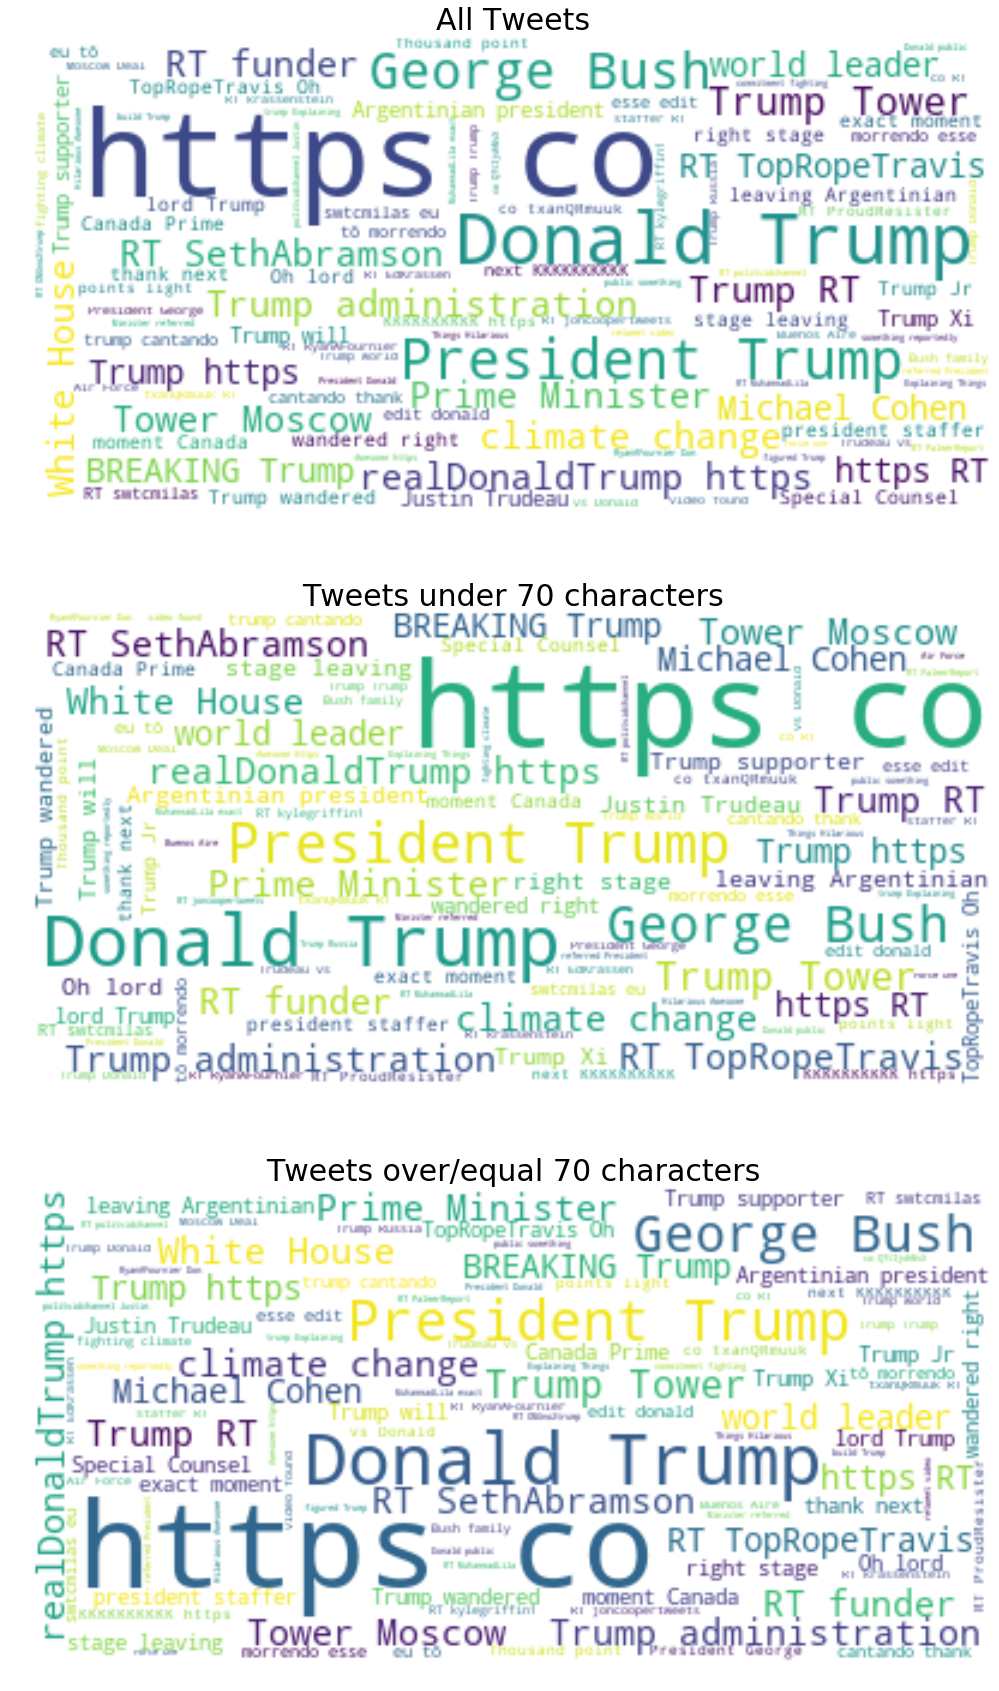

In [10]:
# Start with one review:
shorts = df[df['tweet_len']<70]
longs = df[df['tweet_len']>=70]
total = " ".join(review for review in df.text)
shorts = " ".join(review for review in df.text)
longs = " ".join(review for review in df.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_total = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(total)
wordcloud_shorts = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(shorts)
wordcloud_longs = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(longs)

# Display the generated image:
ax[0].imshow(wordcloud_total, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_shorts, interpolation='bilinear')
ax[1].set_title('Tweets under 70 characters',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_longs, interpolation='bilinear')
ax[2].set_title('Tweets over/equal 70 characters',fontsize=30)
ax[2].axis('off')

In [10]:
def remove_newlines(tweet):
    tweet = re.split('\\n', str(tweet))
    tweet = ''.join(tweet)
    return tweet

In [11]:
def remove_links(tweet):
    tweet = re.split('https*', str(tweet))[0]
    return tweet

In [12]:
punctuation = '!"“%$&\'()*+,-./:;<=>?[\\]^_`{|}~'

In [13]:
def remove_punct(tweet):
    tweet  = "".join([char for char in tweet if char not in punctuation])
    return tweet

In [14]:
def tokenization(text):
    text = re.split(' ', text)
    return text

In [26]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [23]:
test = df[['id','text','tweet_len']]
test = test[0:1000]
test

,id,text,tweet_len
0,pennyhooker1,"RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you! https://t.co/4IHvUdOygc",111
1,gia_doreen,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,140
2,Tamaraciocci,RT @LincolnsBible: Subpoena Power + FinCEN investigators:\nTax returns will be matched to bank statements.\nBank statements will be matched t…,140
3,hiddenmesulo,RT @ananavarro: “No. No. Really. It was hilarious. He lived and worked in the US. I sent a team. They tortured him. They bled him dry. The…,140
4,dlg_donna,RT @TaxReformExpert: The migrant caravan wants President Trump to speed up the asylum process so more migrants can get into the United Stat…,140
5,TallTallDaddy,RT @JohnWDean: It will be a state funeral for Geo. H.W. Bush. When his wife Barbara recently passed Trump was asked not to attend. What in…,139
6,VicImes,RT @maddow: https://t.co/CicXNU5NTP,35
7,PKvideo,"RT @DeanObeidallah: Here is Trump jus a few months ago ridiculing George H.W. Bush famous words about a ""thousand points of light"" which wa…",140
8,foxnews69723842,@politico https://t.co/rq4IvJN5cl,33
9,jamesjburkeIII,"RT @RazorPack65: @realDonaldTrump I really can't believe how many loving, tolerant caring liberals troll the president of the USA. Your tot…",140


In [31]:
test['text_links'] = test['text'].apply(lambda x: remove_links(x))
test['text_newline'] = test['text_links'].apply(lambda x: remove_newlines(x))
test['text_punct'] = test['text_newline'].apply(lambda x: remove_punct(x))
test['text_token'] = test['text_punct'].apply(lambda x: tokenization(x))
test['text_stop'] = test['text_token'].apply(lambda x: " ".join(remove_stopwords(x)))

In [32]:
test

,id,text,tweet_len,text_links,text_newline,text_punct,text_token,text_stop
0,pennyhooker1,"RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you! https://t.co/4IHvUdOygc",111,"RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you!","RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you!",RT @realDonaldTrump Great day at the #G20Summit in Buenos Aires Argentina Thank you,"[RT, @realDonaldTrump, Great, day, at, the, #G20Summit, in, Buenos, Aires, Argentina, Thank, you, ]",RT @realDonaldTrump Great day #G20Summit Buenos Aires Argentina Thank
1,gia_doreen,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,140,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,RT @kenvogel NEW Former top TRUMP fundraiser @ELLIOTTBROIDY accepted at least 6M in laundered money to lobby the Trump administration t…,"[RT, @kenvogel, NEW, Former, top, TRUMP, fundraiser, @ELLIOTTBROIDY, accepted, at, least, 6M, in, laundered, money, to, lobby, the, Trump, administration, t…]",RT @kenvogel NEW Former top TRUMP fundraiser @ELLIOTTBROIDY accepted least 6M laundered money lobby Trump administration t…
2,Tamaraciocci,RT @LincolnsBible: Subpoena Power + FinCEN investigators:\nTax returns will be matched to bank statements.\nBank statements will be matched t…,140,RT @LincolnsBible: Subpoena Power + FinCEN investigators:\nTax returns will be matched to bank statements.\nBank statements will be matched t…,RT @LincolnsBible: Subpoena Power + FinCEN investigators:Tax returns will be matched to bank statements.Bank statements will be matched t…,RT @LincolnsBible Subpoena Power FinCEN investigatorsTax returns will be matched to bank statementsBank statements will be matched t…,"[RT, @LincolnsBible, Subpoena, Power, , FinCEN, investigatorsTax, returns, will, be, matched, to, bank, statementsBank, statements, will, be, matched, t…]",RT @LincolnsBible Subpoena Power FinCEN investigatorsTax returns matched bank statementsBank statements matched t…
3,hiddenmesulo,RT @ananavarro: “No. No. Really. It was hilarious. He lived and worked in the US. I sent a team. They tortured him. They bled him dry. The…,140,RT @ananavarro: “No. No. Really. It was hilarious. He lived and worked in the US. I sent a team. They tortured him. They bled him dry. The…,RT @ananavarro: “No. No. Really. It was hilarious. He lived and worked in the US. I sent a team. They tortured him. They bled him dry. The…,RT @ananavarro No No Really It was hilarious He lived and worked in the US I sent a team They tortured him They bled him dry The…,"[RT, @ananavarro, No, No, Really, It, was, hilarious, He, lived, and, worked, in, the, US, , I, sent, a, team, They, tortured, him, They, bled, him, dry, The…]",RT @ananavarro No No Really It hilarious He lived worked US I sent team They tortured They bled dry The…
4,dlg_donna,RT @TaxReformExpert: The migrant caravan wants President Trump to speed up the asylum process so more migrants can get into the United Stat…,140,RT @TaxReformExpert: The migrant caravan wants President Trump to speed up the asylum process so more migrants can get into the United Stat…,RT @TaxReformExpert: The migrant caravan wants President Trump to speed up the asylum process so more migrants can get into the United Stat…,RT @TaxReformExpert The migrant caravan wants President Trump to speed up the asylum process so more migrants can get into the United Stat…,"[RT, @TaxReformExpert, The, migrant, caravan, wants, President, Trump, to, speed, up, the, asylum, process, so, more, migrants, can, get, into, the, United, Stat…]",RT @TaxReformExpert The migrant caravan wants President Trump s

### Tweets en inglés

In [33]:
from langdetect import detect,DetectorFactory, detect_langs
DetectorFactory.seed = 0

In [34]:
for index, tweet in enumerate(test['text_newline']):
    try:
        if detect(tweet) != 'en':
            test = test.drop([index], axis=0)
    except:
        #print(index)
        test = test.drop([index], axis=0)

In [35]:
test = test.reset_index(drop=True)
test

,id,text,tweet_len,text_links,text_newline,text_punct,text_token,text_stop
0,pennyhooker1,"RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you! https://t.co/4IHvUdOygc",111,"RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you!","RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you!",RT @realDonaldTrump Great day at the #G20Summit in Buenos Aires Argentina Thank you,"[RT, @realDonaldTrump, Great, day, at, the, #G20Summit, in, Buenos, Aires, Argentina, Thank, you, ]",RT @realDonaldTrump Great day #G20Summit Buenos Aires Argentina Thank
1,gia_doreen,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,140,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,RT @kenvogel NEW Former top TRUMP fundraiser @ELLIOTTBROIDY accepted at least 6M in laundered money to lobby the Trump administration t…,"[RT, @kenvogel, NEW, Former, top, TRUMP, fundraiser, @ELLIOTTBROIDY, accepted, at, least, 6M, in, laundered, money, to, lobby, the, Trump, administration, t…]",RT @kenvogel NEW Former top TRUMP fundraiser @ELLIOTTBROIDY accepted least 6M laundered money lobby Trump administration t…
2,Tamaraciocci,RT @LincolnsBible: Subpoena Power + FinCEN investigators:\nTax returns will be matched to bank statements.\nBank statements will be matched t…,140,RT @LincolnsBible: Subpoena Power + FinCEN investigators:\nTax returns will be matched to bank statements.\nBank statements will be matched t…,RT @LincolnsBible: Subpoena Power + FinCEN investigators:Tax returns will be matched to bank statements.Bank statements will be matched t…,RT @LincolnsBible Subpoena Power FinCEN investigatorsTax returns will be matched to bank statementsBank statements will be matched t…,"[RT, @LincolnsBible, Subpoena, Power, , FinCEN, investigatorsTax, returns, will, be, matched, to, bank, statementsBank, statements, will, be, matched, t…]",RT @LincolnsBible Subpoena Power FinCEN investigatorsTax returns matched bank statementsBank statements matched t…
3,hiddenmesulo,RT @ananavarro: “No. No. Really. It was hilarious. He lived and worked in the US. I sent a team. They tortured him. They bled him dry. The…,140,RT @ananavarro: “No. No. Really. It was hilarious. He lived and worked in the US. I sent a team. They tortured him. They bled him dry. The…,RT @ananavarro: “No. No. Really. It was hilarious. He lived and worked in the US. I sent a team. They tortured him. They bled him dry. The…,RT @ananavarro No No Really It was hilarious He lived and worked in the US I sent a team They tortured him They bled him dry The…,"[RT, @ananavarro, No, No, Really, It, was, hilarious, He, lived, and, worked, in, the, US, , I, sent, a, team, They, tortured, him, They, bled, him, dry, The…]",RT @ananavarro No No Really It hilarious He lived worked US I sent team They tortured They bled dry The…
4,dlg_donna,RT @TaxReformExpert: The migrant caravan wants President Trump to speed up the asylum process so more migrants can get into the United Stat…,140,RT @TaxReformExpert: The migrant caravan wants President Trump to speed up the asylum process so more migrants can get into the United Stat…,RT @TaxReformExpert: The migrant caravan wants President Trump to speed up the asylum process so more migrants can get into the United Stat…,RT @TaxReformExpert The migrant caravan wants President Trump to speed up the asylum process so more migrants can get into the United Stat…,"[RT, @TaxReformExpert, The, migrant, caravan, wants, President, Trump, to, speed, up, the, asylum, process, so, more, migrants, can, get, into, the, United, Stat…]",RT @TaxReformExpert The migrant caravan wants President Trump s

### Ngrams

In [36]:
from nltk.util import ngrams

In [37]:
test['token_bigrams'] = test['text_token'].apply(lambda x: list(ngrams(x,2)))
test['token_trigrams'] = test['text_token'].apply(lambda x: list(ngrams(x,3)))
test

,id,text,tweet_len,text_links,text_newline,text_punct,text_token,text_stop,token_bigrams,token_trigrams
0,pennyhooker1,"RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you! https://t.co/4IHvUdOygc",111,"RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you!","RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you!",RT @realDonaldTrump Great day at the #G20Summit in Buenos Aires Argentina Thank you,"[RT, @realDonaldTrump, Great, day, at, the, #G20Summit, in, Buenos, Aires, Argentina, Thank, you, ]",RT @realDonaldTrump Great day #G20Summit Buenos Aires Argentina Thank,"[(RT, @realDonaldTrump), (@realDonaldTrump, Great), (Great, day), (day, at), (at, the), (the, #G20Summit), (#G20Summit, in), (in, Buenos), (Buenos, Aires), (Aires, Argentina), (Argentina, Thank), (Thank, you), (you, )]","[(RT, @realDonaldTrump, Great), (@realDonaldTrump, Great, day), (Great, day, at), (day, at, the), (at, the, #G20Summit), (the, #G20Summit, in), (#G20Summit, in, Buenos), (in, Buenos, Aires), (Buenos, Aires, Argentina), (Aires, Argentina, Thank), (Argentina, Thank, you), (Thank, you, )]"
1,gia_doreen,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,140,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,RT @kenvogel NEW Former top TRUMP fundraiser @ELLIOTTBROIDY accepted at least 6M in laundered money to lobby the Trump administration t…,"[RT, @kenvogel, NEW, Former, top, TRUMP, fundraiser, @ELLIOTTBROIDY, accepted, at, least, 6M, in, laundered, money, to, lobby, the, Trump, administration, t…]",RT @kenvogel NEW Former top TRUMP fundraiser @ELLIOTTBROIDY accepted least 6M laundered money lobby Trump administration t…,"[(RT, @kenvogel), (@kenvogel, NEW), (NEW, Former), (Former, top), (top, TRUMP), (TRUMP, fundraiser), (fundraiser, @ELLIOTTBROIDY), (@ELLIOTTBROIDY, accepted), (accepted, at), (at, least), (least, 6M), (6M, in), (in, laundered), (laundered, money), (money, to), (to, lobby), (lobby, the), (the, Trump), (Trump, administration), (administration, t…)]","[(RT, @kenvogel, NEW), (@kenvogel, NEW, Former), (NEW, Former, top), (Former, top, TRUMP), (top, TRUMP, fundraiser), (TRUMP, fundraiser, @ELLIOTTBROIDY), (fundraiser, @ELLIOTTBROIDY, accepted), (@ELLIOTTBROIDY, accepted, at), (accepted, at, least), (at, least, 6M), (least, 6M, in), (6M, in, laundered), (in, laundered, money), (laundered, money, to), (money, to, lobby), (to, lobby, the), (lobby, the, Trump), (the, Trump, administration), (Trump, administration, t…)]"
2,Tamaraciocci,RT @LincolnsBible: Subpoena Power + FinCEN investigators:\nTax returns will be matched to bank statements.\nBank statements will be matched t…,140,RT @LincolnsBible: Subpoena Power + FinCEN investigators:\nTax returns will be matched to bank statements.\nBank statements will be matched t…,RT @LincolnsBible: Subpoena Power + FinCEN investigators:Tax returns will be matched to bank statements.Bank statements will be matched t…,RT @LincolnsBible Subpoena Power FinCEN investigatorsTax returns will be matched to bank statementsBank statements will be matched t…,"[RT, @LincolnsBible, Subpoena, Power, , FinCEN, investigatorsTax, returns, will, be, matched, to, bank, statementsBank, statements, will, be, matched, t…]",RT @LincolnsBible Subpoena Power FinCEN investigatorsTax returns matched bank statementsBank statements matched t…,"[(RT, @LincolnsBible), (@LincolnsBible, Subpoena), (Subpoena, Power), (Power, ), (, FinCEN), (FinCEN, investigatorsTax), (investigatorsTax, returns), (returns, will), (will, be), (be, matched), (matched, to), (to, bank), (bank, statementsBank), (statementsBank, statements), (state

### StanfordNLP

In [41]:
from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')
#java -mx6g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -timeout 5000

In [42]:
def sentiment(text):
    stuff = nlp.annotate(text,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json',
                       'timeout': 500000,
                   })
    for s in stuff["sentences"]:
        return s['sentiment']

In [43]:
# def sentences(text):
#     thing = 0
#     stuff = nlp.annotate(text,
#                    properties={
#                        'annotators': 'sentiment',
#                        'outputFormat': 'json',
#                        'timeout': 500000,
#                    })
#     for s in stuff["sentences"]:
#         thing += 1
#     return thing

In [44]:
def value(text):
    #thing = []
    stuff = nlp.annotate(text,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json',
                       'timeout': 500000,
                   })
    for s in stuff["sentences"]:
        return int(s["sentimentValue"])

In [45]:
test['sentiment'] = test['text_punct'].apply(lambda x: sentiment(x))
test['value'] = test['text_punct'].apply(lambda x: value(x))
#test['sentences'] = test['text_newline'].apply(lambda x: sentences(x))

In [46]:
test

,id,text,tweet_len,text_links,text_newline,text_punct,text_token,text_stop,token_bigrams,token_trigrams,sentiment,value
0,pennyhooker1,"RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you! https://t.co/4IHvUdOygc",111,"RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you!","RT @realDonaldTrump: Great day at the #G20Summit in Buenos Aires, Argentina. Thank you!",RT @realDonaldTrump Great day at the #G20Summit in Buenos Aires Argentina Thank you,"[RT, @realDonaldTrump, Great, day, at, the, #G20Summit, in, Buenos, Aires, Argentina, Thank, you, ]",RT @realDonaldTrump Great day #G20Summit Buenos Aires Argentina Thank,"[(RT, @realDonaldTrump), (@realDonaldTrump, Great), (Great, day), (day, at), (at, the), (the, #G20Summit), (#G20Summit, in), (in, Buenos), (Buenos, Aires), (Aires, Argentina), (Argentina, Thank), (Thank, you), (you, )]","[(RT, @realDonaldTrump, Great), (@realDonaldTrump, Great, day), (Great, day, at), (day, at, the), (at, the, #G20Summit), (the, #G20Summit, in), (#G20Summit, in, Buenos), (in, Buenos, Aires), (Buenos, Aires, Argentina), (Aires, Argentina, Thank), (Argentina, Thank, you), (Thank, you, )]",Positive,3
1,gia_doreen,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,140,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,RT @kenvogel: NEW: Former top TRUMP fundraiser @ELLIOTT_BROIDY accepted at least $6M in laundered money to lobby the Trump administration t…,RT @kenvogel NEW Former top TRUMP fundraiser @ELLIOTTBROIDY accepted at least 6M in laundered money to lobby the Trump administration t…,"[RT, @kenvogel, NEW, Former, top, TRUMP, fundraiser, @ELLIOTTBROIDY, accepted, at, least, 6M, in, laundered, money, to, lobby, the, Trump, administration, t…]",RT @kenvogel NEW Former top TRUMP fundraiser @ELLIOTTBROIDY accepted least 6M laundered money lobby Trump administration t…,"[(RT, @kenvogel), (@kenvogel, NEW), (NEW, Former), (Former, top), (top, TRUMP), (TRUMP, fundraiser), (fundraiser, @ELLIOTTBROIDY), (@ELLIOTTBROIDY, accepted), (accepted, at), (at, least), (least, 6M), (6M, in), (in, laundered), (laundered, money), (money, to), (to, lobby), (lobby, the), (the, Trump), (Trump, administration), (administration, t…)]","[(RT, @kenvogel, NEW), (@kenvogel, NEW, Former), (NEW, Former, top), (Former, top, TRUMP), (top, TRUMP, fundraiser), (TRUMP, fundraiser, @ELLIOTTBROIDY), (fundraiser, @ELLIOTTBROIDY, accepted), (@ELLIOTTBROIDY, accepted, at), (accepted, at, least), (at, least, 6M), (least, 6M, in), (6M, in, laundered), (in, laundered, money), (laundered, money, to), (money, to, lobby), (to, lobby, the), (lobby, the, Trump), (the, Trump, administration), (Trump, administration, t…)]",Negative,1
2,Tamaraciocci,RT @LincolnsBible: Subpoena Power + FinCEN investigators:\nTax returns will be matched to bank statements.\nBank statements will be matched t…,140,RT @LincolnsBible: Subpoena Power + FinCEN investigators:\nTax returns will be matched to bank statements.\nBank statements will be matched t…,RT @LincolnsBible: Subpoena Power + FinCEN investigators:Tax returns will be matched to bank statements.Bank statements will be matched t…,RT @LincolnsBible Subpoena Power FinCEN investigatorsTax returns will be matched to bank statementsBank statements will be matched t…,"[RT, @LincolnsBible, Subpoena, Power, , FinCEN, investigatorsTax, returns, will, be, matched, to, bank, statementsBank, statements, will, be, matched, t…]",RT @LincolnsBible Subpoena Power FinCEN investigatorsTax returns matched bank statementsBank statements matched t…,"[(RT, @LincolnsBible), (@LincolnsBible, Subpoena), (Subpoena, Power), (Power, ), (, FinCEN), (FinCEN, investigatorsTax), (investigatorsTax, returns), (returns, will), (will, be), (be, matched), (matched, to), (to, bank), (bank, statementsBank)

In [47]:
test.to_csv('clean_tweets.csv', index=False)